# **Predictive Analytics Ford Car Oleh Nurul Tazkiyah Adam**

# **1. Data Understanding**
- ### **Import Library**

In [135]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

- ### **Menyiapkan Dataset**

  Sumber dataset berasal dari Kaggle yang dapat dilihat melalui [tautan ini](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction). Selanjutnya, memasukkan dataset ke Google Drive pribadi sehingga dapat di download pada Google Colab dengan cara berikut ini


In [136]:
# download dataset dari google drive https://drive.google.com/file/d/1t5jVU93rMo0geyVFbo2Dzm1V_ekX_e6A/view?usp=sharing
!gdown 1t5jVU93rMo0geyVFbo2Dzm1V_ekX_e6A

Downloading...
From: https://drive.google.com/uc?id=1t5jVU93rMo0geyVFbo2Dzm1V_ekX_e6A
To: /content/ford.csv
100% 911k/911k [00:00<00:00, 133MB/s]



- ### **Menampilkan Isi Dataset**

In [137]:
ford = pd.read_csv('ford.csv')
ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


- ### **Exploratory Data Analysis**

Pada dataset Ford terdapat variabel:

- `model` ->  macam-macam merek pada mobil Ford.
- `year` -> tahun model mobil diproduksi.
- `price` -> harga mobil (satuan dollar / $).
- `transmission` -> transmission pada. mobil (Automatic, Manual, Semi-Auto)
- `mileage` -> jarak tempuh yang dapat dilalui mobil.
- `fuelType` -> tipe bahan bakar mobil (Petrol, Diesel, Hybrid, Electric, dll).
- `tax` -> pajak tahunan.
- `mpg` -> efesiensi bahan bakar.
- `engineSize` -> kapasistas mesin pada mobil.

dengan detail informasi jumlah dan tipe data berikut ini,

In [138]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


terdapat **6 data numerik** yakni: `year`, `price`, `mileage`, `tax`, `mpg`, dan `engineSize` 
lalu **3 data kategoris** yakni: `model`, `transmission`, dan `fuelType`.



In [139]:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


keterangan:

- **count** adalah jumlah sampel pada data.
- **mean** adalah nilai rata-rata.
- **std** adalah standar deviasi.
- **min** yaitu nilai minimum setiap kolom.
- **25%** adalah kuartil* pertama (Q1)
- **50%** adalah kuartil* kedua (Q2) atau  median (nilai tengah).
- **75%** adalah kuartil* ketiga (Q3).
- **Max** adalah nilai maksimum

** Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.*

- ### **Menangani Missing Values**

In [140]:
ford.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Seluruh data pada variable dataset terisi, akan tetapi perlu dicek kembali apakah ada data yang bernilai 0.

In [141]:
mileage =(ford.mileage == 0).sum()
mpg =(ford.mpg == 0).sum()
engineSize =(ford.engineSize == 0).sum()

print('nilai 0 pada kolom mileage sebanyak', mileage)
print('nilai 0 pada kolom mpg sebanyak', mpg)
print('nilai 0 pada kolom engineSize sebanyak', engineSize)


nilai 0 pada kolom mileage sebanyak 0
nilai 0 pada kolom mpg sebanyak 0
nilai 0 pada kolom engineSize sebanyak 51


Setelah dilakukan pengecekan terdapat 51 data yang bernilai 0 pada engineSize. Selanjutnya, mengecek jumlah nilai 0 terbanyak pada engineSize.

In [142]:
ford.loc[ford['engineSize']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13862,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
14064,Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0
14082,Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0
15343,KA,2018,10000,Manual,10051,Petrol,150,43.5,0.0
15500,EcoSport,2015,8500,Manual,33403,Diesel,30,61.4,0.0
15775,Focus,2017,13000,Manual,24484,Diesel,145,70.6,0.0
16312,Focus,2015,9170,Manual,28000,Petrol,20,61.4,0.0
16313,Focus,2019,18699,Manual,10000,Petrol,145,46.3,0.0
16321,Fiesta,2017,9899,Manual,10000,Petrol,0,65.7,0.0
16322,Ka+,2018,9999,Manual,15000,Petrol,145,43.5,0.0


Kemudian, menghapus baris data pada kolom `mileage`, `mpg`, `engineSize` yang bernilai 0.



In [143]:
ford = ford.loc[(ford[['mileage','mpg','engineSize']]!=0).all(axis=1)]
ford.shape

(17915, 9)

Pengecekan data setelah menangani missing value.

In [144]:
ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17915.000000,17915.000000,17915.000000,17915.000000,17915.000000,17915.000000
mean,2016.865197,12280.966118,23373.346414,113.342004,57.909846,1.354653
std,2.051495,4743.706539,19476.449288,62.016558,10.127366,0.426924
min,1996.000000,495.000000,1.000000,0.000000,20.800000,1.000000
25%,2016.000000,8999.000000,9987.500000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18250.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31083.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


- ### **Menangani Outliers**

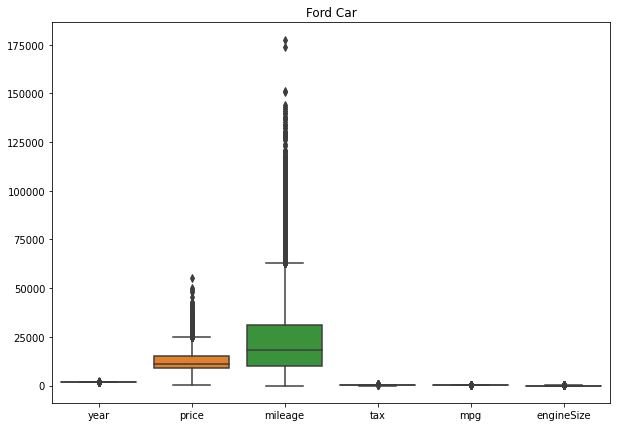

In [145]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=ford).set_title("Ford Car")
plt.show()


**Outlier** adalah sampel yang memiliki nilai yang sangat jauh dari cakupan umum data utama dan hasil pengamatan yang kemunculannya sangat jarang serta hasil pengamatannya berbeda dari data lainnya. Jika dilihat dari plot diatas, outliers terbanyak pada variable mileage dengan 175.000-an outliers.

kemudian, menangani outliers dengan persamaan:
- Batas bawah = `Q1 - 1.5 * IQR`
- Batas atas = `Q3 + 1.5 * IQR`
- Kemudian membuat rumus IQR (Inter Quartile Range) `IQR = Q3 - Q1`

In [146]:
Q1 = ford.quantile(0.25)
Q3 = ford.quantile(0.75)
IQR = Q3-Q1
ford=ford[~((ford<(Q1-1.5*IQR))|(ford>(Q3+1.5*IQR))).any(axis=1)]

ford.shape

<ipython-input-146-0dfca70a39e6>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ford=ford[~((ford<(Q1-1.5*IQR))|(ford>(Q3+1.5*IQR))).any(axis=1)]


(16450, 9)

Didapatkan data sebanyak 16.450 sampel setelah menangani outliers.

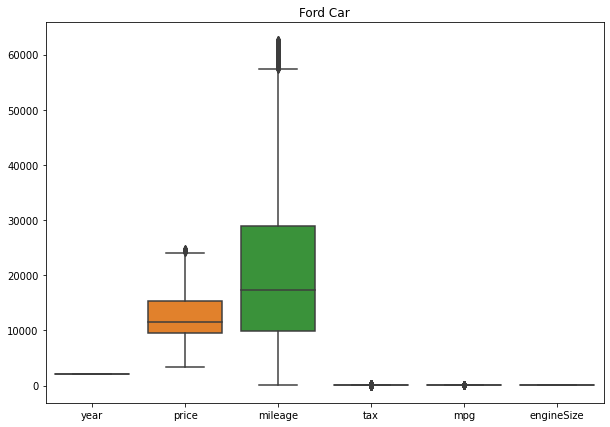

In [147]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=ford).set_title("Ford Car")
plt.show()

sangat terlihat perubahan setelah pembersihan outliers. Salah satunya pada mileage, outliers menjadi 60.000-an yang sebelumnya 175.000-an.

- ### **Univariate Analysis**

Membagi fitur pada dataset menjadi dua bagian, yaitu numerical dan categorical.

In [148]:
numerical = ['year','price','mileage','tax','mpg','engineSize']
categorical = ['model','transmission','fuelType']

- **Analisis fitur categorical: Model**

                        jumlah sampel  persentase
 Fiesta                          6198        37.7
 Focus                           4172        25.4
 Kuga                            2065        12.6
 EcoSport                        1132         6.9
 Ka+                              526         3.2
 C-MAX                            494         3.0
 Mondeo                           360         2.2
 B-MAX                            339         2.1
 S-MAX                            236         1.4
 Grand C-MAX                      234         1.4
 Galaxy                           187         1.1
 Edge                             152         0.9
 KA                               148         0.9
 Puma                              73         0.4
 Grand Tourneo Connect             56         0.3
 Tourneo Custom                    46         0.3
 Tourneo Connect                   30         0.2
 Transit Tourneo                    1         0.0
Focus                               1         0.0


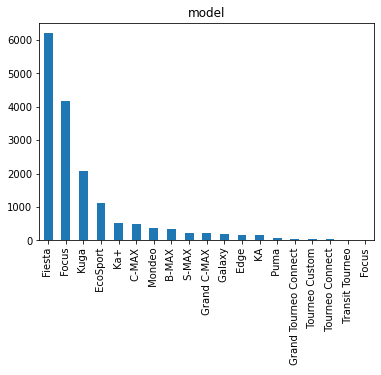

In [149]:
feature = categorical[0]
count = ford[feature].value_counts()
percent = 100*ford[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

- **Analisis fitur categorical: Transmission**

           jumlah sampel  persentase
Manual             14305        87.0
Automatic           1149         7.0
Semi-Auto            996         6.1


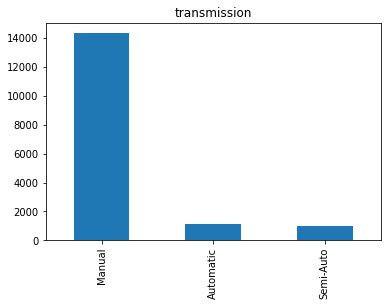

In [150]:
feature = categorical[1]
count = ford[feature].value_counts()
percent = 100*ford[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

- **Analisis fitur categorical: Fuel Type**

          jumlah sampel  persentase
Petrol            11477        69.8
Diesel             4962        30.2
Hybrid                8         0.0
Electric              2         0.0
Other                 1         0.0


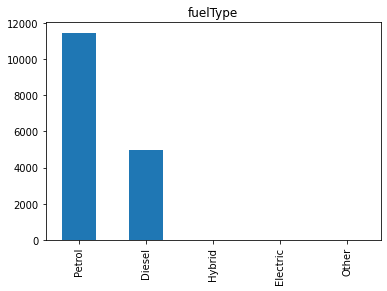

In [151]:
feature = categorical[2]
count = ford[feature].value_counts()
percent = 100*ford[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

- **Analisis Fitur Numerical: Year, Price, Mileage, Tax, Mpg dan EngineSize.**

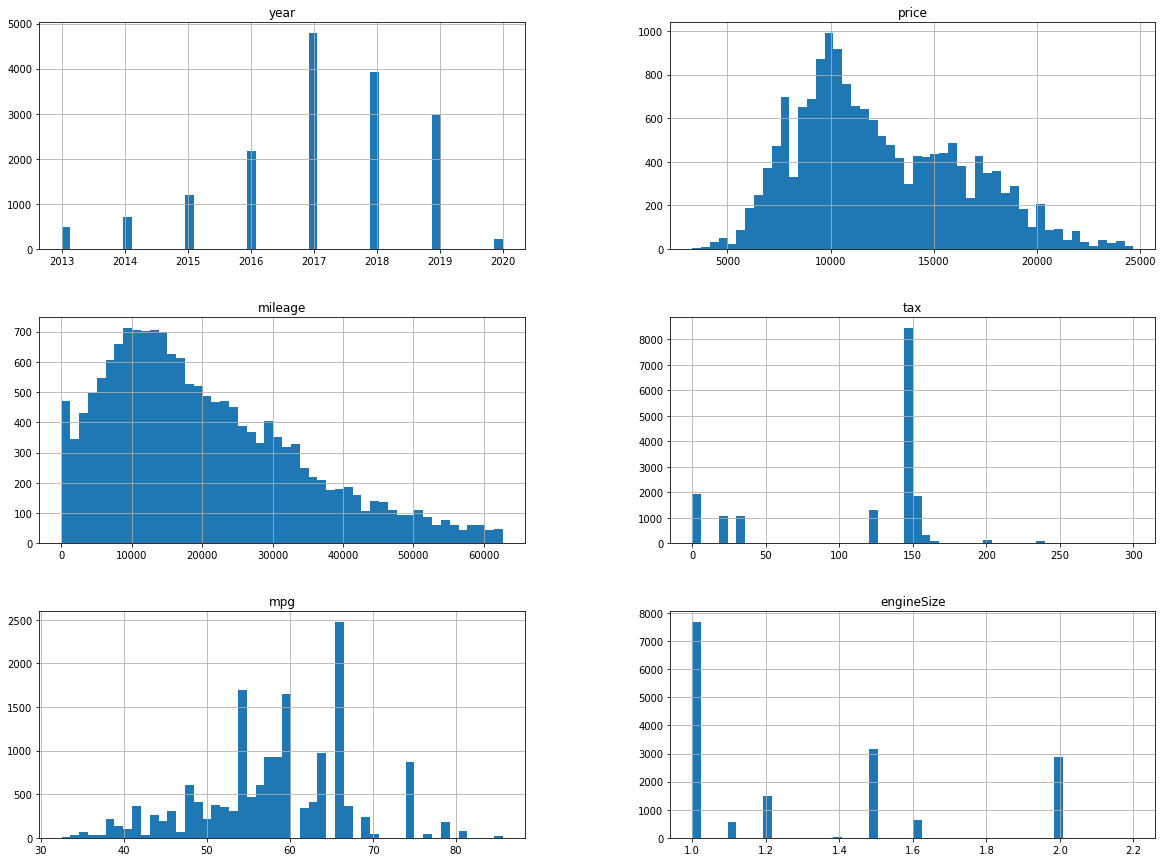

In [152]:
ford.hist(bins=50, figsize=(20,15))
plt.show()

- ### **Multivariate Analysis**

Mengecek rata-rata price terhadap masing-masing fitur kategoris. Hal ini dilakukan untuk mengetahui pengaruh fitur kategoris terhadap price.

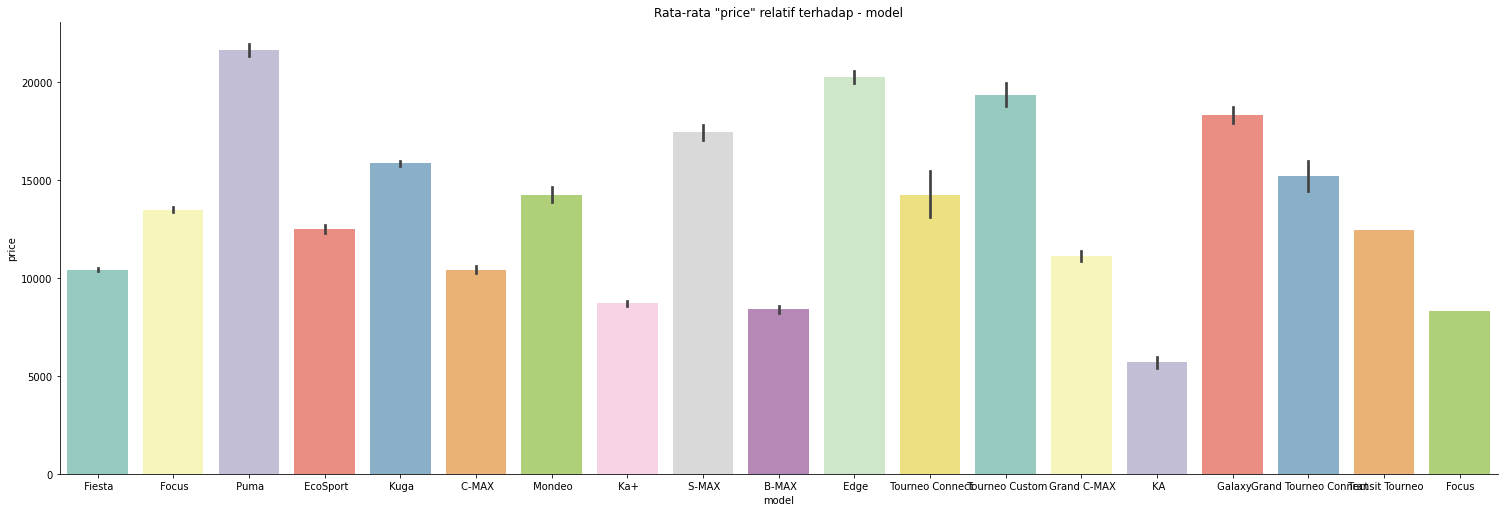

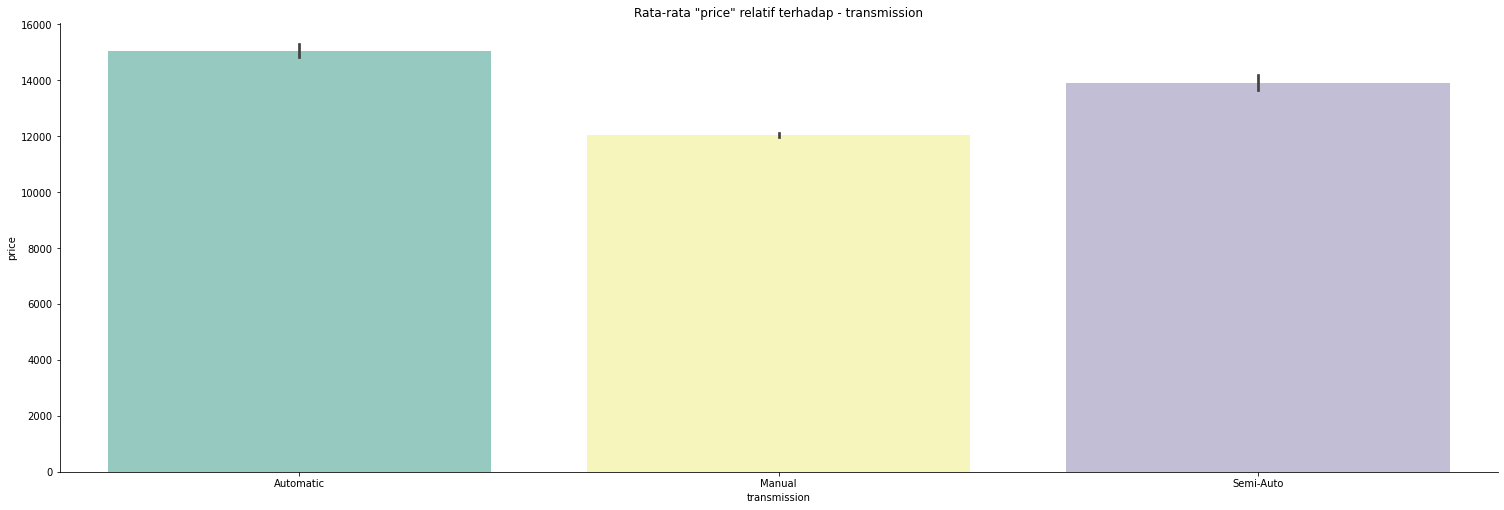

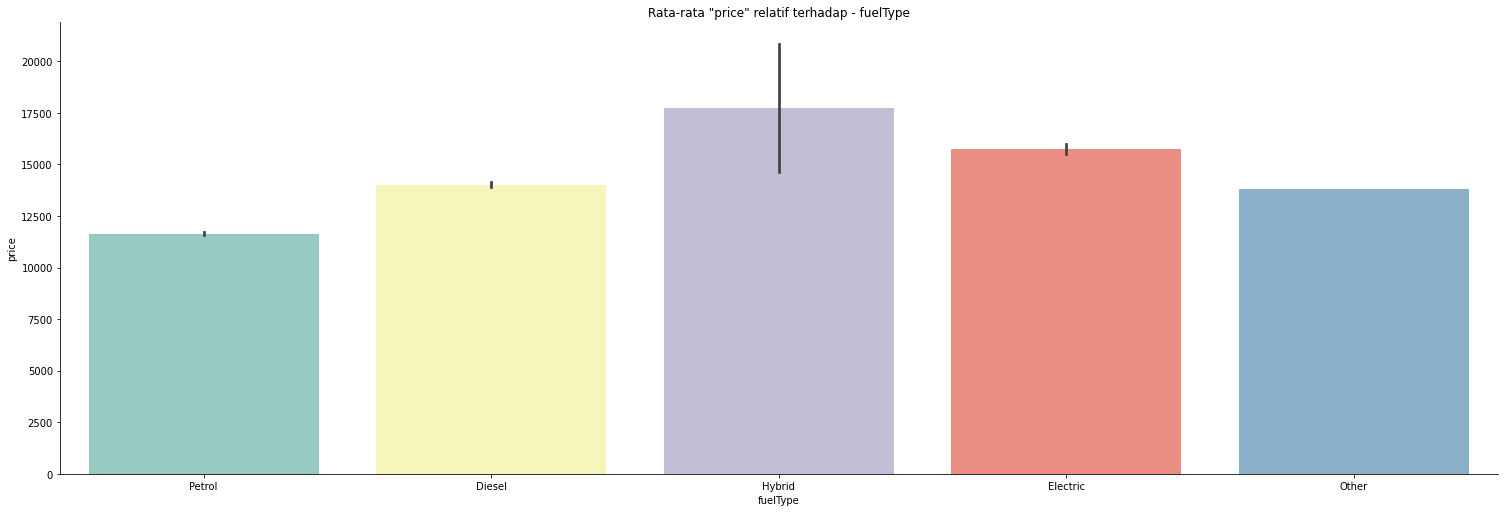

In [153]:
categorical_features = ford.select_dtypes(include='object').columns.to_list()
for col in categorical_features:
    sns.catplot(x=col, 
                y='price', 
                kind='bar', 
                dodge=False, 
                height = 7, 
                aspect= 3, 
                data=ford, 
                palette='Set3')
    plt.title('Rata-rata "price" relatif terhadap - {}'.format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

- Pada `model`, rata-rata harga cenderung berbeda. Rentangnya berada antara 500 hingga 20.000-an. Grade tertinggi yaitu grade up memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur model memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
- Pada `transmission`, rata-rata transmission yang paling rendah adalah transmission manual dan harganya pun rendah dibandingkan dengan transmission automatic dan semi-auto, hal ini menunjukkan bahwa fitur transmission memiliki pengaruh yang tinggi terhadap harga.
- Pada `fuelType`, pada umumnya, fueltype yang memiliki graden lebih tinggi memiliki harga yang tinggi juga, hal ini menunjukkan bahwa fitur fuelType memiiki pengaruh yang tinggi terhadap harga.

Kesimpulan akhir, fitur kategori memiliki pengaruh yang tinggi terhadap harga.

- **Kolerasi Fitur Numerik dengan Fitur Target menggunakan fungsi corr()**

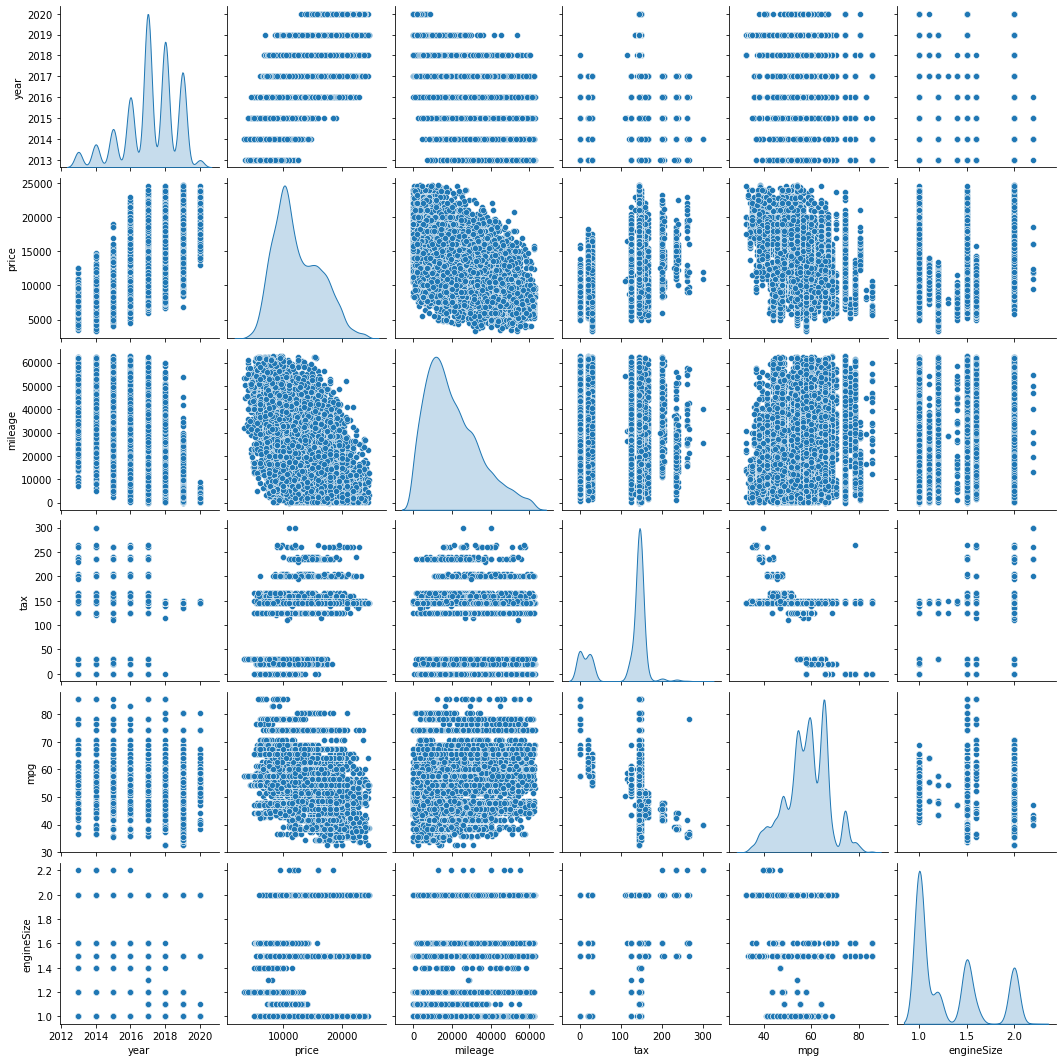

In [154]:
sns.pairplot(ford, diag_kind='kde')

- **Kolerasi Fitur Numerik Menggunakan Heatmap Correlation Matrix**

Text(0.5, 1.0, 'Matrix Kolerasi Fitur Numerik')

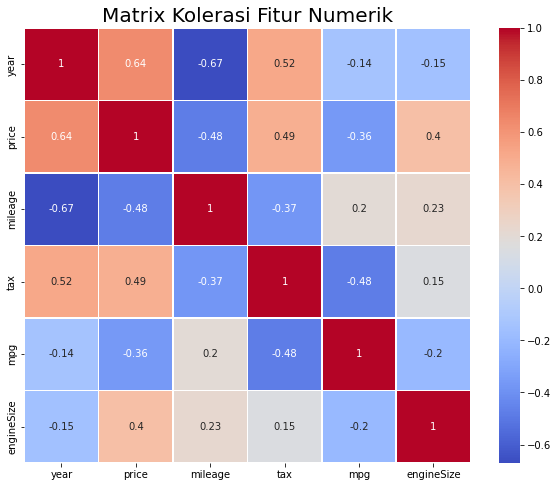

In [155]:
plt.figure(figsize=(10,8))
correlation_matrics = ford.corr().round(2)
sns.heatmap(data=correlation_matrics, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrix Kolerasi Fitur Numerik', size=20)

Berdasarkan diagram heatmap di atas, disimpulkan bahwa:

- Rentang nilai dari 1 sampai -0.67.
- Jika nilai mendekati 1, maka korelasi antar fitur numerik semakin kuat positif.
- Jika nilai mendekati 0, maka korelasinya semakin rendah atau semakin tidak ada korelasi.
- Jika nilai mendekati -1, maka korelasi antar fitur numerik semakin kuat negatif.
- Korelasi antar fitur numerik yang memiliki korelasi positif dengan fitur `price` yakni fitur `tax`, `year`, dan `engineSize` (0.4 sampai 0.64)
- Sedangkan fitur `mileage` dan `mpg` memiliki korelasi yang sangat kecil (-0.36 sampai -0.48). Sehingga, fitur tersebut dapat di-drop.

In [156]:
ford.drop(['mileage'], inplace=True, axis=1)
ford.drop(['mpg'], inplace=True, axis=1)
ford.head()

,model,year,price,transmission,fuelType,tax,engineSize
0,Fiesta,2017,12000,Automatic,Petrol,150,1.0
1,Focus,2018,14000,Manual,Petrol,150,1.0
2,Focus,2017,13000,Manual,Petrol,150,1.0
3,Fiesta,2019,17500,Manual,Petrol,145,1.5
4,Fiesta,2019,16500,Automatic,Petrol,145,1.0


# **2. Data Preparation**
- ### **Encoding Fitur Kategoris**

In [157]:
ford = pd.concat([ford, pd.get_dummies(ford['model'], prefix='model', drop_first=True)], axis=1)
ford = pd.concat([ford, pd.get_dummies(ford['transmission'], prefix='transmission', drop_first=True)], axis=1)
ford = pd.concat([ford, pd.get_dummies(ford['fuelType'], prefix='fuelType', drop_first=True)], axis=1)
ford.drop(['model','transmission','fuelType'], axis=1, inplace=True)
ford.head()

,year,price,tax,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Fiesta,model_ Focus,model_ Galaxy,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,150,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,14000,150,1.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,13000,150,1.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,17500,145,1.5,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,16500,145,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


- ### **Reduksi Dimensi PCA**

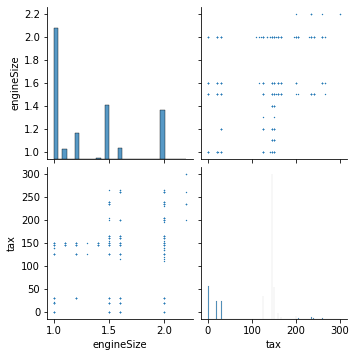

In [158]:
sns.pairplot(ford[['engineSize','tax']], plot_kws={'s':2})

- **Aplikasi Class PCA**

In [159]:
pca = PCA(n_components=2, random_state=123)
pca.fit(ford[['engineSize','tax']])
princ_comp = pca.transform(ford[['engineSize','tax']])

- **Informasi Kedua Komponen**


In [160]:
pca.explained_variance_ratio_.round(2)

array([1., 0.])

- **Membuat Fitur dengan nama 'feature'**

fitur ini untuk mengganti fitur engineSize dan tax.

In [161]:
pca = PCA(n_components=1, random_state=123)
pca.fit(ford[['engineSize','tax']])
ford['feature'] = pca.transform(ford.loc[:, ('engineSize','tax')]).flatten()
ford.drop(['engineSize','tax'], axis=1, inplace=True)

- ### **Membagi Data Latih dan Data Uji dengan Train Test Split**

In [162]:
x = ford.drop(['price'], axis=1)
y = ford['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(13160, 26) (13160,)
(3290, 26) (3290,)


- ### **Standarisasi**
Standarisasi pada fitur numerik yaitu year dan feature menggunakan StandardScaler untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

In [163]:
numerical = ['year','feature']
scaler = StandardScaler()
scaler.fit(x_train[numerical])
x_train[numerical] = scaler.transform(x_train.loc[:, numerical])
x_train[numerical].head()

,year,feature
14196,-0.732058,0.534341
14025,-0.732058,0.195251
13849,-2.039146,-1.415370
3567,-2.692689,0.195264
17833,0.575029,0.619098


In [164]:
x_train[numerical].describe().round(4)

,year,feature
count,13160.0000,13160.0000
mean,0.0000,0.0000
std,1.0000,1.0000
min,-2.6927,-1.9240
25%,-0.7321,0.1952
50%,-0.0785,0.5343
75%,0.5750,0.5343
max,1.8821,3.1622


# **3. Model Development**
Menggabungkan tiga model algoritma yang akan digunakan yaitu K-Nearest Neighbor (KNN), Random Forest, dan Boosting Algorithm. Kemudian, mencari performa yang paling baik dari ketiga algoritma tersebut.

- **menyiapkan data frame**

In [165]:
models = pd.DataFrame(index=['train_mse','test_mse'],
                    columns=['KNN', 'RandomForest', 'Boosting'])

- ### **K-Nearest Neighbor**

In [166]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_train)

- ### **Random Forest**

In [167]:
RF = RandomForestRegressor(n_estimators=45, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)

### **Boosting Algorithm**

In [168]:
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

# **4. Evaluasi Model**
- ### **Mengukur seberapa kecil nilai error MSE**

In [169]:
x_test.loc[:, numerical] = scaler.transform(x_test[numerical])

In [170]:
mse = pd.DataFrame(columns=['train','test'],index=['KNN','RF','Boosting'])
model_dict = {'KNN':knn, 'RF':RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3
mse

,train,test
KNN,1662.436891,1605.018533
RF,1460.487585,1523.150922
Boosting,6457.216399,6183.160884


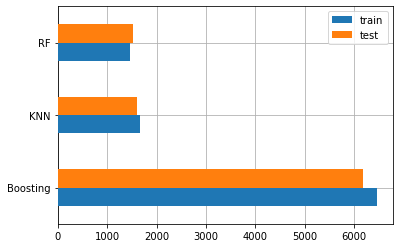

In [171]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model RF memberikan nilai eror yang paling kecil. Model inilah yang dapat digunakan sebagai model terbaik untuk melakukan prediksi harga mobil Ford.

- ### **Nilai Akurasi Model**

In [172]:
knn_accuracy = knn.score(x_test, y_test)*100
rf_accuracy = RF.score(x_test, y_test)*100
boosting_accuracy = boosting.score(x_test, y_test)*100

In [173]:
list_evaluasi = [[knn_accuracy],
            [rf_accuracy],
            [boosting_accuracy]]
evaluasi = pd.DataFrame(list_evaluasi,
                        columns=['Accuracy (%)'],
                        index=['K-Nearest Neighbor', 'Random Forest', 'Boosting'])
evaluasi

,Accuracy (%)
K-Nearest Neighbor,89.689553
Random Forest,90.215461
Boosting,60.280116


Dari hasil evaluasi di atas dapat memberikan informasi bahwa model Algorithma Random Forest mencapai akurasi hingga 90% lebih, model KNN 89% lebih, sedangkan model Boosting masih termasuk rendah yakni 60%

### **Prediksi**

In [174]:
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
12643,10499,10441.6,10442.6,10591.5


dapat dilihat dari prediksi di atas bahwa prediki dengan model RF memberikan hasil yang paling mendekati nilai y_true dibanding dengan kedua model lainnya.

Referensi:


*   [Prediksi Harga Bitcoin](https://github.com/AzharRizky/Bitcoin-Predictive-Anlaytics/blob/main/Submission_1_MLT.ipynb)
*   [Prediksi Harga Gemstone](https://github.com/chelizaaa/gemstone-predictive-analytics/blob/main/Gemstone%20Predictive%20Analytics.ipynb)
*   [Prediksi Harga Mobil](https://github.com/onedayxzn/prediksi-harga-mobil-volkswagen/blob/master/Submissiomv1_3.ipynb)



